<a href="https://colab.research.google.com/github/roberta-helena/projetos_estudo/blob/main/Flai_4_ML_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning - Classificação

Continuando a exploração do mesmo conjunto de dados dos projetos anteriores, neste projeto temos como objetivo descobrir quais clientes do nosso dataset são fumantes e quais não são fumantes (variável **smoker**) com base nas variáveis de entrada custos (variável **charges**) e IMC (variável **bmi**). Para isso, utilizaremos os algoritmos de classificação: Regressão Logística, KNN e Árvore de Decisão

Observaremos novas métricas para avaliar a performance de modelos de classificação e, da mesma forma que fizemos no projeto "Flai 3 - ML Regressão (KNN e Árvore de Decisão)", vamos comparar nossos modelos e otimizar suas performances. Neste projeto, optamos por ajustar os modelos procurando otimizar sua acurácia

Utilizaremos:


*   Modelo: Regressão Logística, KNN e Árvore de Decisão
*   Método de Validação: K-FOLD
*   Métrica: Métricas para Classificação Binária

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from google.colab.data_table import DataTable

In [ ]:
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'

dados = pd.read_csv(url)

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000

In [ ]:
X = dados[['bmi','charges']]
y = dados['smoker']

##Validação Cruzada K-FOLD

O K-FOLD é um procedimento de validação que separa os dados em até n partes (sendo n = tamanho do conjunto de dados), mantendo uma proporção entre grupos de teste e treinamento. Ele percorre o conjunto de dados inteiro de modo que todos os dados são utilizados tanto para teste quanto para treino do modelo 

In [ ]:
kf = KFold(n_splits = 10, shuffle = False)

## Métricas para Classificação Binária

São métricas de avaliação de desempenho de modelos de classificação com base na Matriz de Confusão, que contabiliza e compara as respostas previstas pelo modelo (RP) com as respostas observadas na realidade (RO). Quando:

*   RO = 0 e RP = 0: verdadeiro negativo [vn]
*   RO = 1 e RP = 1: verdadeiro positivo [vp]
*   RO = 0 e RP = 1: falso positivo [fp]
*   RO = 1 e RP = 0: falso negativo [fn]   

A partir disso podem ser calculadas as medidas chamadas Métricas para Classificação Binária:




*   Acurácia: Verdadeiros / Todos [Taxa de Acerto]
>(vn + vp) / (vn + fp + fn + vp)

*   Sensibilidade: Verdadeiros Positivos / Todos os Positivos Observados [Taxa de Acerto dos Positivos]
>vp / (vp + fn)

*   Especificidade: Verdadeiros Negativos / Todos os Negativos Observados
>vn / (vn + fp)

*   Precisão: Verdadeiros Positivos / Todos os Positivos Preditos [Valor Preditivo Positivo] 
>vp / (vp + fp)

*   Valor Preditivo Negativo: Verdadeiros Negativos / Todos os Negativos Preditos
>vn / (vn+fn)





*   Coeficiente de Correlação de Matthews: Métrica Geral
>(vp x vn - fp x fn) / [(vp + fp) x (vp + fn) x (vn + fp) x (vn + fn)] ^0.5

*   Eficiência: Média entre Sensibilidade e Especificidade [Acurácia Balanceada]
>(Sen + Ef) / 2

*   F1-Score: Métrica Geral, Média Harmônica entre Sensibilidade e Precisão
>(2 x Sen x Prec) / (Sen + Prec)

##Modelos de Classificação

Entregam variáveis categóricas binárias (0 ou 1) a partir do cálculo de probabilidades. Quando a probabilidade calculada pelo modelo é inferior a 50%, ele classifica o elemento na classe 0. Sendo a probabilidade maior que 50%, ele o classifica como 1. Neste projeto, 1 identifica pessoas fumantes e 0, pessoas não fumantes

###Regressão Logística

Calcula as probabilidades de acordo com a seguinte fórmula: $$log[p/(1-p)] = b0 + bn*xn$$

In [ ]:
reglog = LogisticRegression()

AVALIAÇÃO DO MODELO

Usando a validação K-FOLD e o modelo definidos acima, calculamos as Métricas para Classificação Binária para avaliar a performance do modelo. Neste cenário, calculamos a Acurácia, Sensibilidade e Precisão

In [ ]:
metricas_reglog = cross_validate(reglog, X, y, cv = kf, scoring = ['accuracy','recall','precision'])

print('Acurácia: ', metricas_reglog['test_accuracy'].mean().round(4))
print('Sensibilidade: ', metricas_reglog['test_recall'].mean().round(4))
print('Precisão: ', metricas_reglog['test_precision'].mean().round(4))

mts_reglog = [metricas_reglog['test_accuracy'].mean().round(4), metricas_reglog['test_recall'].mean().round(4), metricas_reglog['test_precision'].mean().round(4)]

Acurácia:  0.9328
Sensibilidade:  0.81
Precisão:  0.8594


Podemos olhar também para a Matriz de Confusão da Regressão Logística, observando quantas previsões nosso modelo acertou e quantas ele errou. Como ajustamos o modelo em todos os dados do conjunto, o resultado apresenta overfitting

In [ ]:
reglog.fit(X, y)
preditos_reglog = reglog.predict(X)

mc_reglog = confusion_matrix(y, preditos_reglog)
vn_rl, fp_rl, fn_rl, vp_rl = mc_reglog.flatten()

print('Verdadeiros Positivos: {}'.format(vp_rl))
print('Verdadeiros Negativos: {}'.format(vn_rl))
print('Falsos Positivos: {}'.format(fp_rl))
print('Falsos Negativos: {}'.format(fn_rl))
print('\nTOTAL: {}'.format(fn_rl+fp_rl+vn_rl+vp_rl))

print('Acurácia com overfitting: ', round((vn_rl + vp_rl) / (vn_rl + fp_rl + fn_rl + vp_rl),4))

Verdadeiros Positivos: 220
Verdadeiros Negativos: 1029
Falsos Positivos: 35
Falsos Negativos: 54

TOTAL: 1338
Acurácia com overfitting:  0.9335


REGIÃO DE DECISÃO

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


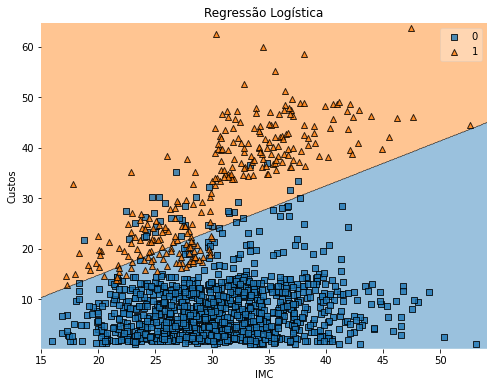

In [ ]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = reglog, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Regressão Logística')
plt.show()

###KNN

Calcula as probabilidades de acordo com os valores dos vizinhos mais próximos: $$P(X) = modavizinhos / totalvizinhos$$

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)

AVALIAÇÃO DO MODELO

Usando a validação K-FOLD e o modelo definidos acima, calculamos as Métricas para Classificação Binária para avaliar a performance do modelo. Neste cenário, calculamos a Acurácia, Sensibilidade e Precisão

In [ ]:
metricas_knn = cross_validate(knn, X, y, cv = kf, scoring = ['accuracy','recall','precision'])

print('Acurácia: ', metricas_knn['test_accuracy'].mean().round(4))
print('Sensibilidade: ', metricas_knn['test_recall'].mean().round(4))
print('Precisão: ', metricas_knn['test_precision'].mean().round(4))

mts_knn = [metricas_knn['test_accuracy'].mean().round(4), metricas_knn['test_recall'].mean().round(4), metricas_knn['test_precision'].mean().round(4)]

Acurácia:  0.9582
Sensibilidade:  0.9619
Precisão:  0.8565


Podemos olhar também para a Matriz de Confusão do KNN, observando quantas previsões nosso modelo acertou e quantas ele errou. Como ajustamos o modelo em todos os dados do conjunto, o resultado apresenta overfitting

In [ ]:
knn.fit(X, y)
preditos_knn = knn.predict(X)

mc_knn = confusion_matrix(y, preditos_knn)
vn_k, fp_k, fn_k, vp_k = mc_knn.flatten()

print('Verdadeiros Positivos: {}'.format(vp_k))
print('Verdadeiros Negativos: {}'.format(vn_k))
print('Falsos Positivos: {}'.format(fp_k))
print('Falsos Negativos: {}'.format(fn_k))
print('\nTOTAL: {}'.format(fn_k+fp_k+vn_k+vp_k))

print('Acurácia com overfitting: ', round((vn_k + vp_k) / (vn_k + fp_k + fn_k + vp_k),4))

Verdadeiros Positivos: 266
Verdadeiros Negativos: 1022
Falsos Positivos: 42
Falsos Negativos: 8

TOTAL: 1338
Acurácia com overfitting:  0.9626


REGIÃO DE DECISÃO

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


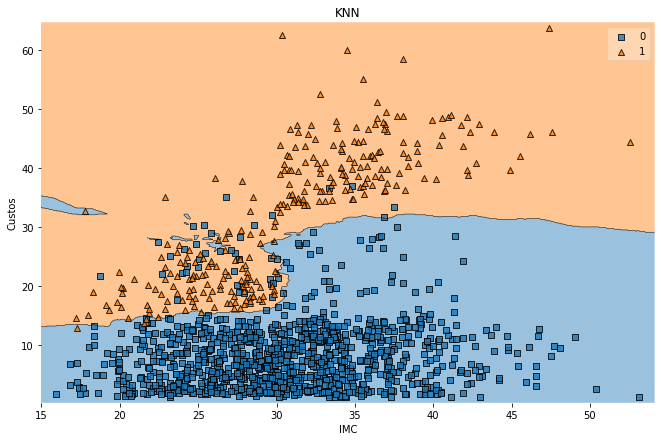

In [ ]:
plt.figure(figsize = (11, 7))
plot_decision_regions(X.values, y.values, clf = knn, legend = 1);
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('KNN')
plt.show()

###Árvore de Decisão

Calcula a probabilidade a partir da moda dos valores presentes em cada repartição final: $$P(X) = modavalores/totalvalores$$

In [ ]:
arvore = DecisionTreeClassifier(max_depth = 3)

AVALIAÇÃO DO MODELO

Usando a validação K-FOLD e o modelo definidos acima, calculamos as Métricas para Classificação Binária para avaliar a performance do modelo. Neste cenário, calculamos a Acurácia, Sensibilidade e Precisão

In [ ]:
metricas_arvore = cross_validate(arvore, X, y, cv = kf, scoring = ['accuracy','recall','precision'])

print('Acurácia: ', metricas_arvore['test_accuracy'].mean().round(4))
print('Sensibilidade: ', metricas_arvore['test_recall'].mean().round(4))
print('Precisão: ', metricas_arvore['test_precision'].mean().round(4))

mts_arvore = [metricas_arvore['test_accuracy'].mean().round(4), metricas_arvore['test_recall'].mean().round(4), metricas_arvore['test_precision'].mean().round(4)]

Acurácia:  0.9634
Sensibilidade:  0.9654
Precisão:  0.8722


Podemos olhar também para a Matriz de Confusão da Árvore de Decisão, observando quantas previsões nosso modelo acertou e quantas ele errou. Como ajustamos o modelo em todos os dados do conjunto, o resultado apresenta overfitting

In [ ]:
arvore.fit(X, y)
preditos_arvore = arvore.predict(X)

mc_arvore = confusion_matrix(y, preditos_arvore)
vn_ad, fp_ad, fn_ad, vp_ad = mc_arvore.flatten()

print('Verdadeiros Positivos: {}'.format(vp_ad))
print('Verdadeiros Negativos: {}'.format(vn_ad))
print('Falsos Positivos: {}'.format(fp_ad))
print('Falsos Negativos: {}'.format(fn_ad))
print('\nTOTAL: {}'.format(fn_ad+fp_ad+vn_ad+vp_ad))

print('Acurácia com overfitting: ', round((vn_ad + vp_ad) / (vn_ad + fp_ad + fn_ad + vp_ad),4))

Verdadeiros Positivos: 270
Verdadeiros Negativos: 1026
Falsos Positivos: 38
Falsos Negativos: 4

TOTAL: 1338
Acurácia com overfitting:  0.9686


REGIÃO DE DECISÃO

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


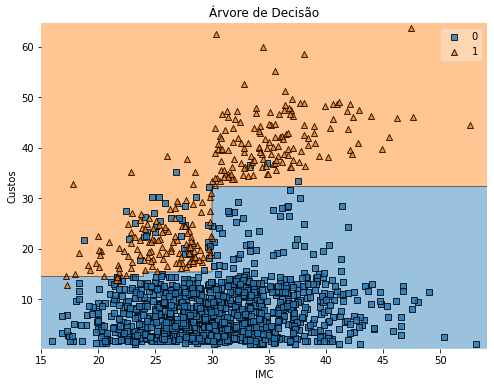

In [ ]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = arvore, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Árvore de Decisão')
plt.show()

Podemos visualizar as partições feitas pela árvore:

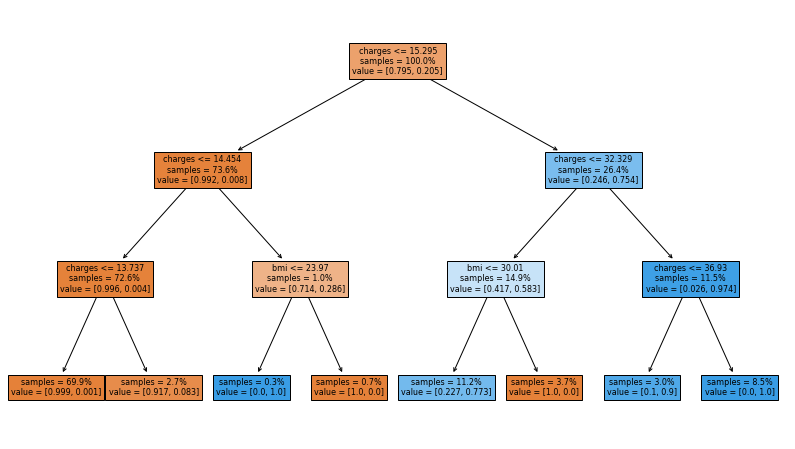

In [ ]:
plt.figure(figsize = (14, 8))
plot_tree(arvore, filled = True, proportion = True, impurity = False, feature_names = X.columns)
plt.show()

##Comparando Modelos

Podemos avaliar a performance de cada modelo por meio da comparação de suas métricas

In [ ]:
resultados0 = {'Regressão Logística': mts_reglog,
              'KNN': mts_knn,
              'Árvore de Decisão': mts_arvore}

metricas_nomes = ['Acurácia', 'Sensibilidade', 'Precisão']

resultados = pd.DataFrame(resultados0, index = metricas_nomes).T
DataTable(resultados)

,Acurácia,Sensibilidade,Precisão
Regressão Logística,0.9328,0.8100,0.8594
KNN,0.9582,0.9619,0.8565
Árvore de Decisão,0.9634,0.9654,0.8722


#Achando o Melhor Modelo (Métrica: Acurácia)

Para otimizar um modelo é preciso definir uma métrica em que se deseja alcançar o melhor resultado possível. Neste projeto a métrica escolhida foi a Acurácia, que mede a taxa de acerto do modelo

###Melhor KNN

Repetimos o modelo de KNN 200 vezes, a cada vez incrementando em uma unidade o número de vizinhos levados em conta no cálculo da moda. O algoritmo retorna o melhor ajuste k e seu respectivo valor de acurácia

In [ ]:
reps = 200
accs_knn = []

for i in range(1, reps+1):
  knn1 = KNeighborsClassifier(n_neighbors = i)
  acc_knn = cross_val_score(knn1, X, y, cv = kf, scoring = 'accuracy')
  media_knn = acc_knn.mean()
  accs_knn.append(media_knn)

melhor_knn_k = accs_knn.index(max(accs_knn))+1
melhor_knn_acc = round(max(accs_knn), 4)

print(f'Acurácia {melhor_knn_k}-NN: {melhor_knn_acc:.4f}')

Acurácia 29-NN: 0.9626


REGIÃO DE DECISÃO

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


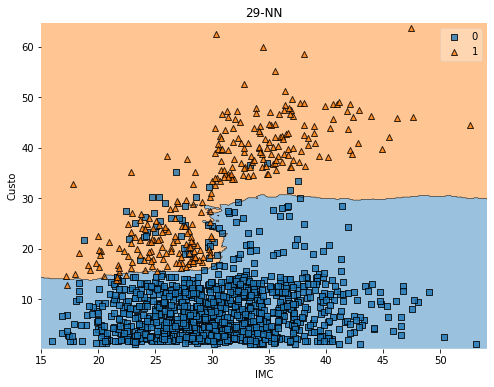

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors = melhor_knn_k)
knn1.fit(X, y)
preditos_knn1 = knn1.predict(X)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = knn1, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title(f'{melhor_knn_k}-NN')
plt.show()

###Melhor Árvore

Repetimos o modelo da árvore 10 vezes, a cada vez incrementando em uma unidade o número de partições feitas no conjunto de dados. O algoritmo retorna o melhor número de repartições e seu respectivo valor de acurácia

In [ ]:
reps = 10
accs_tree = []

for i in range(1, reps+1):
  tree1 = DecisionTreeClassifier(max_depth = i)
  acc_tree = cross_val_score(tree1, X, y, cv = kf, scoring = 'accuracy')
  media_tree = acc_tree.mean()
  accs_tree.append(media_tree)

melhor_tree_depth = accs_tree.index(max(accs_tree))+1
melhor_tree_acc = round(max(accs_tree), 4)

print(f'Acurácia Profundidade {melhor_tree_depth}: {melhor_tree_acc:.4f}')

Acurácia Profundidade 3: 0.9634


REGIÃO DE DECISÃO

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


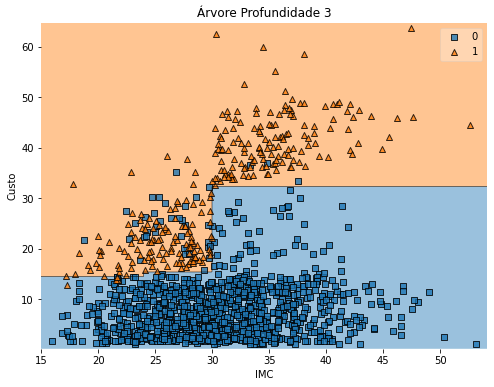

In [ ]:
tree1 = DecisionTreeClassifier(max_depth = melhor_tree_depth)
tree1.fit(X, y)
preditos_tree1 = tree1.predict(X)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = tree1, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title(f'Árvore Profundidade {melhor_tree_depth}')
plt.show()

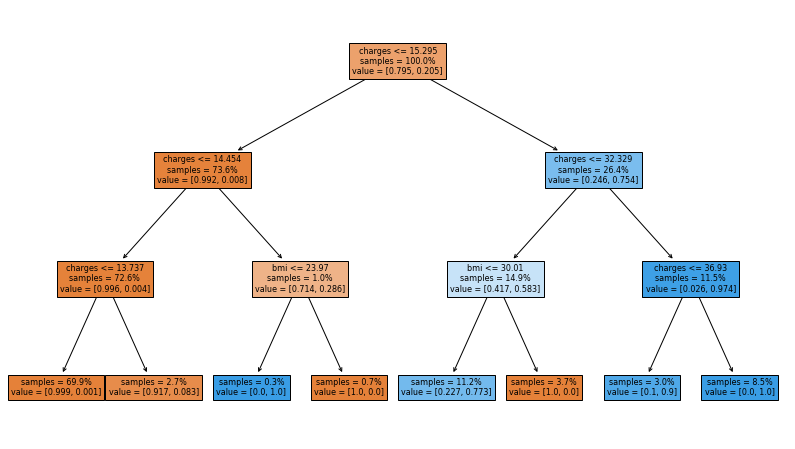

In [ ]:
plt.figure(figsize = (14, 8))
plot_tree(tree1, filled = True, proportion = True, impurity = False, feature_names = ['bmi','charges'])
plt.show()

###Regressão Logística

Apesar de não ter um parâmetro a ser otimizado, podemos utilizar também a Regressão Logística para fazer a classificação e comparar sua acurácia a dos modelos otimizados anteriormente

In [ ]:
reglog1 = LogisticRegression()

In [ ]:
accs_reglog = cross_val_score(reglog1, X, y, cv = kf, scoring = 'accuracy')
acc_reglog = accs_reglog.mean()
print(f'Acurácia Regressão Logística: {acc_reglog:.4f}')

Acurácia Regressão Logística: 0.9328


REGIÃO DE DECISÃO

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


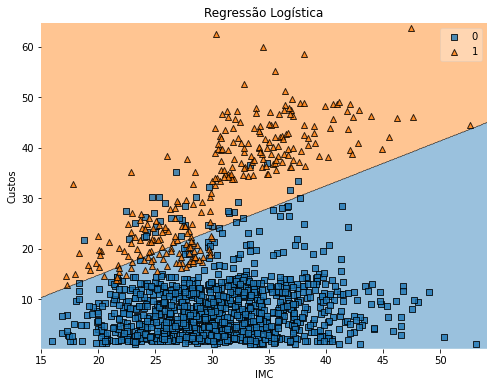

In [ ]:
reglog1.fit(X, y)
preditos_rl1 = reglog1.predict(X)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = reglog1, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title(f'Regressão Logística')
plt.show()

##Comparando os Melhores Modelos

Podemos então comparar a acurácia dos modelos ajustados e determinar qual deles retornou o maior valor para a métrica desejada

In [ ]:
accs = {'KNN': [round(melhor_knn_acc, 4)],
        'Árvore de Decisão': [round(melhor_tree_acc, 4)],
        'Regressão Logística': [round(acc_reglog,4)]}

In [ ]:
resultados = pd.DataFrame(accs.values(), index = accs.keys(), columns = ['Acurácia'])
resultados.sort_values(by='Acurácia', ascending = False)

,Acurácia
Árvore de Decisão,0.9634
KNN,0.9626
Regressão Logística,0.9328


#Considerações Finais

Neste projeto, empregamos os modelos de classificação de Regressão Logística, KNN e Árvore de Decisão para determinar se nossos clientes são ou não fumantes utilizando duas variáveis explicativas, **charges** e **bmi**. Verificamos algumas métricas de classificação binária com as quais podemos avaliar o desempenho de nossos modelos e escolhemos a acurácia como a métrica a ser otimizada. Assim, pudemos comparar a performance de cada modelo com base em suas respectivas acurácias